# **SETUP**


In [ ]:
!pip install scikit-learn matplotlib pandas joblib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

#**LOAD DATA**

In [ ]:
from google.colab import files
uploaded = files.upload()   # Upload Final_data.csv
df = pd.read_csv("Final_data.csv")

target = "Burns_Calories_Bin"
X = df.drop(columns=[target])
y = df[target].astype(str)

cat = X.select_dtypes(include=['object', 'category']).columns.tolist()
num = X.select_dtypes(include=[np.number]).columns.tolist()

Saving Final_data.csv to Final_data (2).csv


# **TRAIN-TEST SPLIT**

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

n = 10000
if len(X_train_full) > n:
    sss = StratifiedShuffleSplit(n_splits=1, train_size=n, random_state=42)
    idx, _ = next(sss.split(X_train_full, y_train_full))
    X_train, y_train = X_train_full.iloc[idx], y_train_full.iloc[idx]
else:
    X_train, y_train = X_train_full, y_train_full

# **MODEL PIPELINE**

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat)
])

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression(max_iter=300, solver='saga', multi_class='multinomial', n_jobs=-1))
])

# **TRAIN & CROSS-VALIDATE**

In [ ]:
for s in scoring:
    mean_val = cv[f'test_{s}'].mean()
    std_val = cv[f'test_{s}'].std()
    print(f"{s.capitalize()} → Mean: {mean_val:.4f}, Standard Deviation: {std_val:.4f}")

Accuracy → Mean: 0.9561, Standard Deviation: 0.0035
Precision_macro → Mean: 0.9561, Standard Deviation: 0.0036
Recall_macro → Mean: 0.9561, Standard Deviation: 0.0035
F1_macro → Mean: 0.9561, Standard Deviation: 0.0036


# **TEST EVALUTAION**

In [ ]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("\nTest Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro', zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='macro', zero_division=0):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred, average='macro', zero_division=0):.4f}")

cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  index=np.unique(y), columns=np.unique(y))
print("\nConfusion Matrix:")
display(cm)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Test Metrics:
Accuracy:  0.9585
Precision: 0.9584
Recall:    0.9585
F1-Score:  0.9584

Confusion Matrix:


,High,Low,Medium,Very High
High,945,0,28,27
Low,0,977,24,0
Medium,25,37,937,0
Very High,25,0,0,975


from matplotlib import pyplot as plt
cm['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cm['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cm['Medium'].plot(kind='hist', bins=20, title='Medium')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cm['Very High'].plot(kind='hist', bins=20, title='Very High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cm.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cm.plot(kind='scatter', x='Low', y='Medium', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cm.plot(kind='scatter', x='Medium', y='Very High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cm['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cm['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cm['Medium'].plot(kind='line', figsize=(8, 4), title='Medium')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cm['Very High'].plot(kind='line', figsize=(8, 4), title='Very High')
plt.gca().spines[['top', 'right']].set_visible(False)

# **LEARNING CURVE**

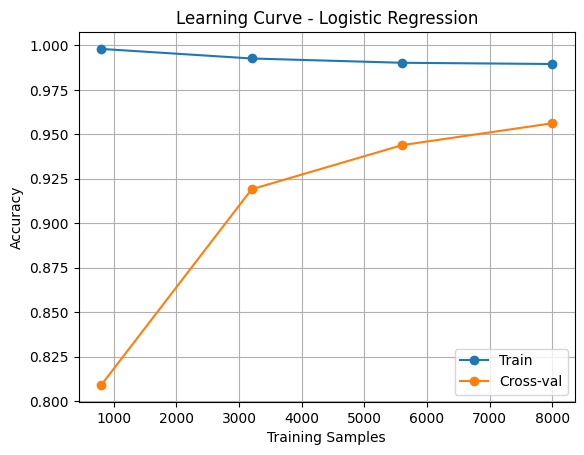

In [ ]:
sizes, train_scores, test_scores = learning_curve(
    pipe, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 4), scoring='accuracy', n_jobs=-1
)

plt.plot(sizes, train_scores.mean(axis=1), 'o-', label="Train")
plt.plot(sizes, test_scores.mean(axis=1), 'o-', label="Cross-val")
plt.title("Learning Curve - Logistic Regression")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# **CHALLENGE - Decision Tree**


Between the two models, Logistic Regression performed slightly better overall in terms of accuracy and consistency. It showed more stable results across the training and testing sets, while the Decision Tree tended to overfit, performing very well on training data but less accurately on unseen data. This suggests that Logistic Regression generalizes better to new samples, whereas the Decision Tree may need tuning or pruning to improve its performance.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_pipe.fit(X_train, y_train)
y_pred_dt = dt_pipe.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9995

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00      1000
         Low       1.00      1.00      1.00      1001
      Medium       1.00      1.00      1.00       999
   Very High       1.00      1.00      1.00      1000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

